# Examples for intro/scipy/summary-exercises/stats-interpolate.md

(the-gumbell-distribution-results)=

## The Gumbell distribution, results

<!--- plot_sprog_annual_maxima -->

Generate the exercise results on the Gumbell distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
years_nb = 21
wspeeds = np.load("examples/sprog-windspeeds.npy")
max_speeds = np.array([arr.max() for arr in np.array_split(wspeeds, years_nb)])

Text(0, 0.5, 'Annual wind speed maxima [$m/s$]')

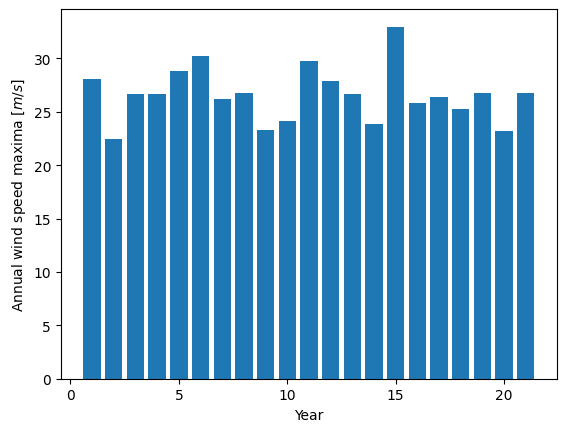

In [3]:
plt.figure()
plt.bar(np.arange(years_nb) + 1, max_speeds)
plt.axis("tight")
plt.xlabel("Year")
plt.ylabel("Annual wind speed maxima [$m/s$]")

(the-gumbell-distribution)=

## The Gumbell distribution

<!--- plot_gumbell_wind_speed_prediction -->

Generate the exercise results on the Gumbell distribution

In [4]:
import scipy as sp

In [5]:
def gumbell_dist(arr):
    return -np.log(-np.log(arr))

In [6]:
years_nb = 21
wspeeds = np.load("examples/sprog-windspeeds.npy")
max_speeds = np.array([arr.max() for arr in np.array_split(wspeeds, years_nb)])
sorted_max_speeds = np.sort(max_speeds)

In [7]:
cprob = (np.arange(years_nb, dtype=np.float32) + 1) / (years_nb + 1)
gprob = gumbell_dist(cprob)
speed_spline = sp.interpolate.UnivariateSpline(gprob, sorted_max_speeds, k=1)
nprob = gumbell_dist(np.linspace(1e-3, 1 - 1e-3, 100))
fitted_max_speeds = speed_spline(nprob)

In [8]:
fifty_prob = gumbell_dist(49.0 / 50.0)
fifty_wind = speed_spline(fifty_prob)

Text(0, 0.5, 'Gumbell cumulative probability')

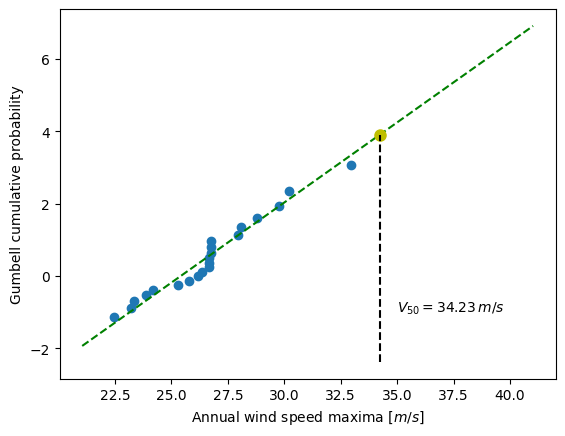

In [9]:
plt.figure()
plt.plot(sorted_max_speeds, gprob, "o")
plt.plot(fitted_max_speeds, nprob, "g--")
plt.plot([fifty_wind], [fifty_prob], "o", ms=8.0, mfc="y", mec="y")
plt.plot([fifty_wind, fifty_wind], [plt.axis()[2], fifty_prob], "k--")
plt.text(35, -1, rf"$V_{{50}} = {fifty_wind:.2f} \, m/s$")
plt.xlabel("Annual wind speed maxima [$m/s$]")
plt.ylabel("Gumbell cumulative probability")

## Other examples

(cumulative-wind-speed-prediction)=

### Cumulative wind speed prediction

<!--- plot_cumulative_wind_speed_prediction -->

Generate the image cumulative-wind-speed-prediction.png
for the interpolate section of the Scipy tutorial page.

In [10]:
max_speeds = np.load("examples/max-speeds.npy")
years_nb = max_speeds.shape[0]

In [11]:
cprob = (np.arange(years_nb, dtype=np.float32) + 1) / (years_nb + 1)
sorted_max_speeds = np.sort(max_speeds)
speed_spline = sp.interpolate.UnivariateSpline(cprob, sorted_max_speeds)
nprob = np.linspace(0, 1, 100)
fitted_max_speeds = speed_spline(nprob)

In [12]:
fifty_prob = 1.0 - 0.02
fifty_wind = speed_spline(fifty_prob)

Text(0, 0.5, 'Cumulative probability')

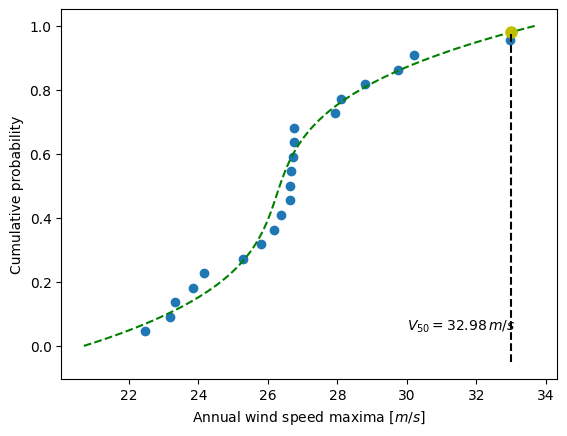

In [13]:
plt.figure()
plt.plot(sorted_max_speeds, cprob, "o")
plt.plot(fitted_max_speeds, nprob, "g--")
plt.plot([fifty_wind], [fifty_prob], "o", ms=8.0, mfc="y", mec="y")
plt.text(30, 0.05, rf"$V_{{50}} = {fifty_wind:.2f} \, m/s$")
plt.plot([fifty_wind, fifty_wind], [plt.axis()[2], fifty_prob], "k--")
plt.xlabel("Annual wind speed maxima [$m/s$]")
plt.ylabel("Cumulative probability")

(the-lidar-system-data-2-of-2-datasets)=

### The lidar system, data (2 of 2 datasets)

<!--- plot_optimize_lidar_complex_data -->

Generate a chart of more complex data recorded by the lidar system

In [14]:
waveform_2 = np.load("examples/waveform_2.npy")

In [15]:
t = np.arange(len(waveform_2))

Text(0, 0.5, 'Amplitude [bins]')

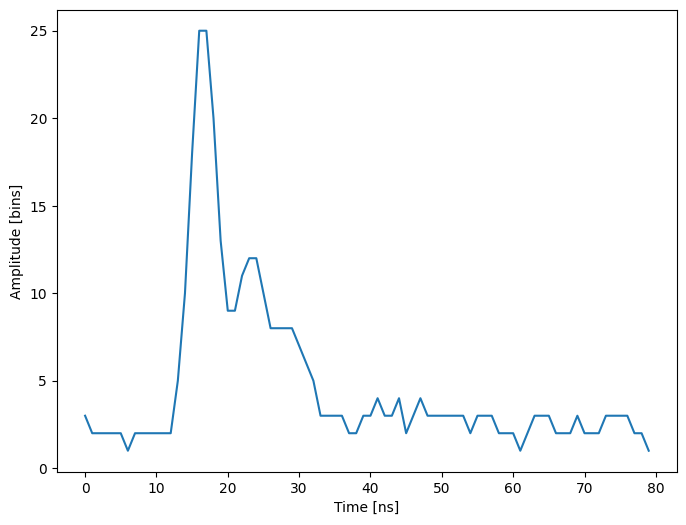

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t, waveform_2)
plt.xlabel("Time [ns]")
plt.ylabel("Amplitude [bins]")

(the-lidar-system-data-and-fit-2-of-2-datasets)=

### The lidar system, data and fit (2 of 2 datasets)

<!--- plot_optimize_lidar_complex_data_fit -->

Generate a chart of the data fitted by Gaussian curve

In [17]:
def model(t, coeffs):
    return (
        coeffs[0]
        + coeffs[1] * np.exp(-(((t - coeffs[2]) / coeffs[3]) ** 2))
        + coeffs[4] * np.exp(-(((t - coeffs[5]) / coeffs[6]) ** 2))
        + coeffs[7] * np.exp(-(((t - coeffs[8]) / coeffs[9]) ** 2))
    )

In [18]:
def residuals(coeffs, y, t):
    return y - model(t, coeffs)

In [19]:
waveform_2 = np.load("examples/waveform_2.npy")
t = np.arange(len(waveform_2))

In [20]:
x0 = np.array([3, 30, 20, 1, 12, 25, 1, 8, 28, 1], dtype=float)
x, flag = sp.optimize.leastsq(residuals, x0, args=(waveform_2, t))

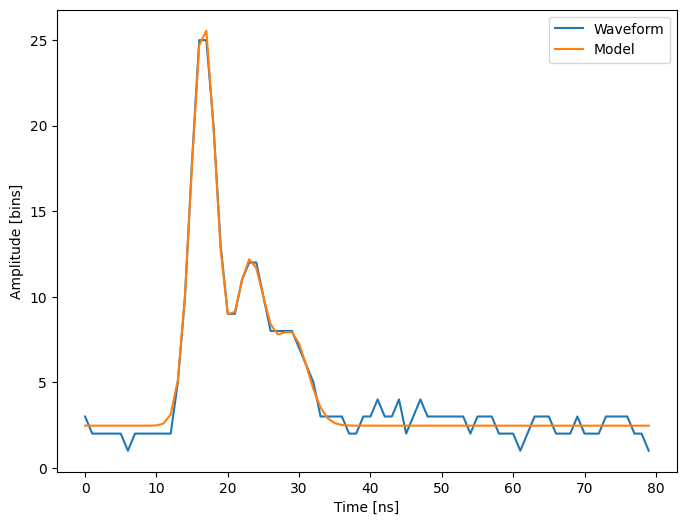

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t, waveform_2, t, model(t, x))
plt.xlabel("Time [ns]")
plt.ylabel("Amplitude [bins]")
plt.legend(["Waveform", "Model"])

(the-lidar-system-data-1-of-2-datasets)=

### The lidar system, data (1 of 2 datasets)

<!--- plot_optimize_lidar_data -->

Generate a chart of the data recorded by the lidar system

In [22]:
waveform_1 = np.load("examples/waveform_1.npy")

In [23]:
t = np.arange(len(waveform_1))

Text(0, 0.5, 'Amplitude [bins]')

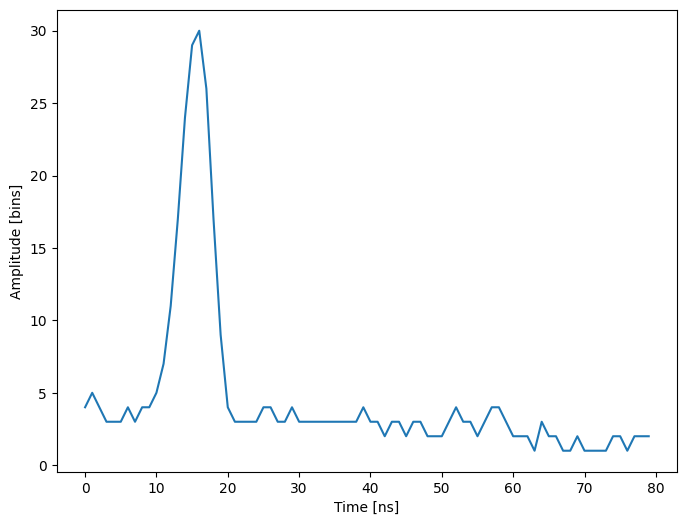

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t, waveform_1)
plt.xlabel("Time [ns]")
plt.ylabel("Amplitude [bins]")

(the-lidar-system-data-and-fit-1-of-2-datasets)=

### The lidar system, data and fit (1 of 2 datasets)

<!--- plot_optimize_lidar_data_fit -->

Generate a chart of the data fitted by Gaussian curve

In [25]:
def model(t, coeffs):
    return coeffs[0] + coeffs[1] * np.exp(-(((t - coeffs[2]) / coeffs[3]) ** 2))

In [26]:
def residuals(coeffs, y, t):
    return y - model(t, coeffs)

In [27]:
waveform_1 = np.load("examples/waveform_1.npy")
t = np.arange(len(waveform_1))

In [28]:
x0 = np.array([3, 30, 15, 1], dtype=float)
x, flag = sp.optimize.leastsq(residuals, x0, args=(waveform_1, t))
x

array([ 2.70363341, 27.82020743, 15.47924562,  3.05636228])

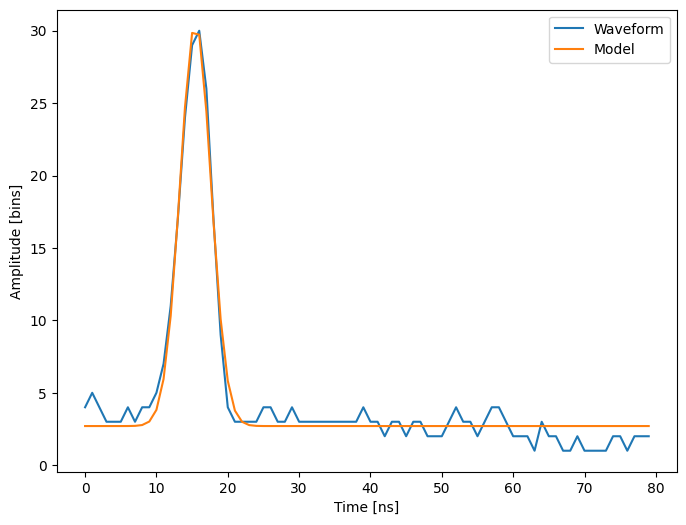

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t, waveform_1, t, model(t, x))
plt.xlabel("Time [ns]")
plt.ylabel("Amplitude [bins]")
plt.legend(["Waveform", "Model"])